C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_12480\1088008938.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{
C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_12480\1088008938.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{
C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_12480\1088008938.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, 

                                                  name  longitude   latitude  \
0                                            Blue Nile -86.908424  40.424551   
1                                   Mad Mushroom Pizza -86.909025  40.424087   
2                                           Basil Thai -86.907614  40.422740   
3                                         Hala's Grill -86.907678  40.422761   
4                                                 Yori -86.929440  40.425466   
..                                                 ...        ...        ...   
153                           Lyles-Porter Hall (LYLE) -86.916692  40.420983   
154                        MRI Modular Facility (MRI1) -86.915417  40.421173   
155  Krannert Center For Executive Education & Rese... -86.911637  40.423480   
156                          Stanley Coulter Hall (SC) -86.914380  40.426525   
157                                        Hansen Hall -86.917011  40.422278   

    index                 type  
0     

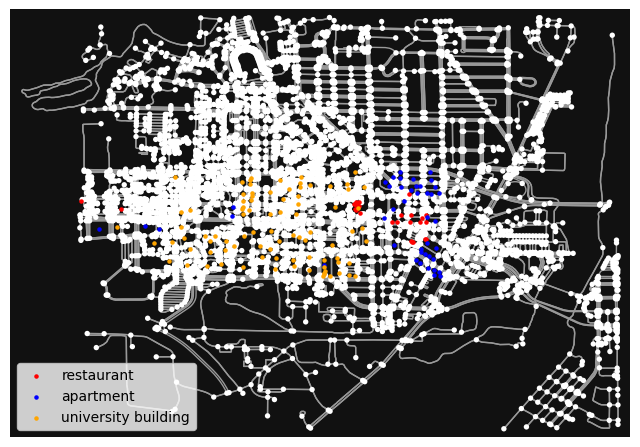

In [3]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pickle

# 设置地图中心点和距离
center_point = (40.4240, -86.9119)  # Purdue Memorial Union 的经纬度
distance = 1500  # 1.5 公里

# 定义西拉斐特区域边界（你提供的坐标范围）
boundary_coords = [
    (-86.930548, 40.427371),  # Northwest corner
    (-86.905710, 40.427371),  # Northeast corner
    (-86.905710, 40.420486),  # Southeast corner
    (-86.930548, 40.420486)   # Southwest corner
]
west_lafayette_boundary = Polygon(boundary_coords)

# 尝试加载保存的兴趣点数据和图表
try:
    with open('pois.pkl', 'rb') as f:
        result = pickle.load(f)
    with open('graph.pkl', 'rb') as f:
        G = pickle.load(f)
    print("Loaded saved data.")
except FileNotFoundError:
    # 获取兴趣点位置
    restaurants = ox.features_from_point(center_point, tags={'amenity': 'restaurant'}, dist=distance)
    apartments = ox.features_from_point(center_point, tags={'building': 'apartments'}, dist=distance)
    university_buildings = ox.features_from_point(center_point, tags={'building': 'university'}, dist=distance)

    # 创建一个新的 DataFrame 以存储结果
    def create_poi_dataframe(pois, poi_type):
        df = pd.DataFrame(columns=['name', 'longitude', 'latitude', 'index', 'type'])
        for idx, row in pois.iterrows():
            name = row['name'] if 'name' in row and pd.notna(row['name']) else 'Unnamed'
            # 处理几何数据，提取点或者多边形的中心点
            if row.geometry.geom_type == 'Point':
                lon, lat = row.geometry.x, row.geometry.y
            elif row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                lon, lat = row.geometry.centroid.x, row.geometry.centroid.y
            else:
                continue

            # 过滤只包含西拉斐特区域内的点
            if west_lafayette_boundary.contains(Point(lon, lat)):
                df = pd.concat([df, pd.DataFrame([{
                    'name': name,
                    'longitude': lon,
                    'latitude': lat,
                    'index': len(df),
                    'type': poi_type
                }])], ignore_index=True)
        return df

    # 分别创建三个兴趣点 DataFrame
    restaurants_df = create_poi_dataframe(restaurants, 'restaurant')
    apartments_df = create_poi_dataframe(apartments, 'apartment')
    university_buildings_df = create_poi_dataframe(university_buildings, 'university building')

    # 合并所有兴趣点
    result = pd.concat([restaurants_df, apartments_df, university_buildings_df], ignore_index=True)

    # 打印结果
    print(result)

    # 保存为 CSV 文件
    result.to_csv('purdue_pois.csv', index=False)

    # 创建图表
    G = ox.graph_from_point(center_point, dist=distance, network_type='all')

    # 保存兴趣点数据和图表
    with open('pois.pkl', 'wb') as f:
        pickle.dump(result, f)
    with open('graph.pkl', 'wb') as f:
        pickle.dump(G, f)
    print("Saved data.")

# 可视化地图
fig, ax = ox.plot_graph(G, show=False, close=False)
colors = {'restaurant': 'red', 'apartment': 'blue', 'university building': 'orange'}

for idx, row in result.iterrows():
    color = colors[row['type']]
    point = Point(row['longitude'], row['latitude'])
    gpd.GeoSeries([point]).plot(ax=ax, color=color, markersize=5, label=row['type'] if row['type'] not in ax.get_legend_handles_labels()[1] else "")

# 显示图例
plt.legend()

# 保存图像
plt.savefig('purdue_map.png', dpi=300)

# 显示地图
plt.show()

# test2

Loaded saved data.


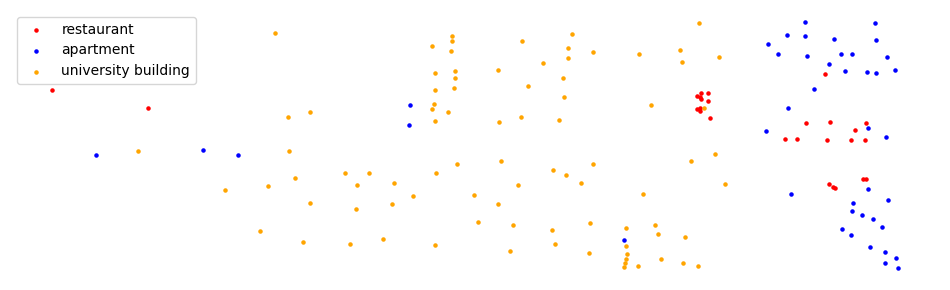

In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pickle

# 设置地图中心点和距离
center_point = (40.4248, -86.9110)  # Purdue Memorial Union 的经纬度
distance = 1500  # 1.5 公里

# 定义西拉斐特区域边界（你提供的坐标范围）
boundary_coords = [
    (-86.930548, 40.427371),  # Northwest corner
    (-86.905710, 40.427371),  # Northeast corner
    (-86.905710, 40.420486),  # Southeast corner
    (-86.930548, 40.420486)   # Southwest corner
]
west_lafayette_boundary = Polygon(boundary_coords)

# 尝试加载保存的兴趣点数据和图表
try:
    with open('pois.pkl', 'rb') as f:
        result = pickle.load(f)
    print("Loaded saved data.")
except FileNotFoundError:
    # 获取兴趣点位置
    restaurants = ox.features_from_point(center_point, tags={'amenity': 'restaurant'}, dist=distance)
    apartments = ox.features_from_point(center_point, tags={'building': 'apartments'}, dist=distance)
    university_buildings = ox.features_from_point(center_point, tags={'building': 'university'}, dist=distance)

    # 创建一个新的 DataFrame 以存储结果
    def create_poi_dataframe(pois, poi_type):
        df = pd.DataFrame(columns=['name', 'longitude', 'latitude', 'index', 'type'])
        for idx, row in pois.iterrows():
            name = row['name'] if 'name' in row and pd.notna(row['name']) else 'Unnamed'
            # 处理几何数据，提取点或者多边形的中心点
            if row.geometry.geom_type == 'Point':
                lon, lat = row.geometry.x, row.geometry.y
            elif row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                lon, lat = row.geometry.centroid.x, row.geometry.centroid.y
            else:
                continue

            # 过滤只包含西拉斐特区域内的点
            if west_lafayette_boundary.contains(Point(lon, lat)):
                df = pd.concat([df, pd.DataFrame([{
                    'name': name,
                    'longitude': lon,
                    'latitude': lat,
                    'index': len(df),
                    'type': poi_type
                }])], ignore_index=True)
        return df

    # 分别创建三个兴趣点 DataFrame
    restaurants_df = create_poi_dataframe(restaurants, 'restaurant')
    apartments_df = create_poi_dataframe(apartments, 'apartment')
    university_buildings_df = create_poi_dataframe(university_buildings, 'university building')

    # 合并所有兴趣点
    result = pd.concat([restaurants_df, apartments_df, university_buildings_df], ignore_index=True)

    # 打印结果
    print(result)

    # 保存为 CSV 文件
    result.to_csv('purdue_pois.csv', index=False)

    # 保存兴趣点数据
    with open('pois.pkl', 'wb') as f:
        pickle.dump(result, f)
    print("Saved data.")

# 可视化地图
fig, ax = plt.subplots(figsize=(12, 8))
colors = {'restaurant': 'red', 'apartment': 'blue', 'university building': 'orange'}

for idx, row in result.iterrows():
    color = colors[row['type']]
    point = Point(row['longitude'], row['latitude'])
    gpd.GeoSeries([point]).plot(ax=ax, color=color, markersize=5, label=row['type'] if row['type'] not in ax.get_legend_handles_labels()[1] else "")

# 移除轴和网格线
ax.set_axis_off()

# 显示图例
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

# 保存图像
plt.savefig('purdue_map.png', dpi=300, bbox_inches='tight', pad_inches=0)

# 显示地图
plt.show()


# test3

Loaded saved data.


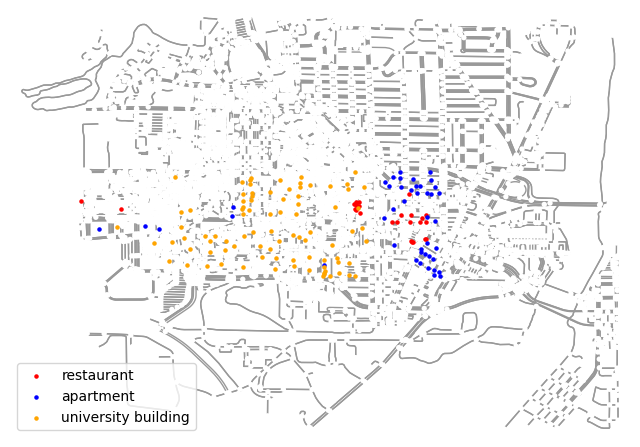

In [2]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pickle

# 设置地图中心点和距离
center_point = (40.4240, -86.9119)  # Purdue Memorial Union 的经纬度
distance = 1500  # 1.5 公里

# 定义西拉斐特区域边界（你提供的坐标范围）
boundary_coords = [
    (-86.930548, 40.427371),  # Northwest corner
    (-86.905710, 40.427371),  # Northeast corner
    (-86.905710, 40.420486),  # Southeast corner
    (-86.930548, 40.420486)   # Southwest corner
]
west_lafayette_boundary = Polygon(boundary_coords)

# 尝试加载保存的兴趣点数据和图表
try:
    with open('pois.pkl', 'rb') as f:
        result = pickle.load(f)
    with open('graph.pkl', 'rb') as f:
        G = pickle.load(f)
    print("Loaded saved data.")
except FileNotFoundError:
    # 获取兴趣点位置
    restaurants = ox.features_from_point(center_point, tags={'amenity': 'restaurant'}, dist=distance)
    apartments = ox.features_from_point(center_point, tags={'building': 'apartments'}, dist=distance)
    university_buildings = ox.features_from_point(center_point, tags={'building': 'university'}, dist=distance)

    # 创建一个新的 DataFrame 以存储结果
    def create_poi_dataframe(pois, poi_type):
        df = pd.DataFrame(columns=['name', 'longitude', 'latitude', 'index', 'type'])
        for idx, row in pois.iterrows():
            name = row['name'] if 'name' in row and pd.notna(row['name']) else 'Unnamed'
            # 处理几何数据，提取点或者多边形的中心点
            if row.geometry.geom_type == 'Point':
                lon, lat = row.geometry.x, row.geometry.y
            elif row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                lon, lat = row.geometry.centroid.x, row.geometry.centroid.y
            else:
                continue

            # 过滤只包含西拉斐特区域内的点
            if west_lafayette_boundary.contains(Point(lon, lat)):
                df = pd.concat([df, pd.DataFrame([{
                    'name': name,
                    'longitude': lon,
                    'latitude': lat,
                    'index': len(df),
                    'type': poi_type
                }])], ignore_index=True)
        return df

    # 分别创建三个兴趣点 DataFrame
    restaurants_df = create_poi_dataframe(restaurants, 'restaurant')
    apartments_df = create_poi_dataframe(apartments, 'apartment')
    university_buildings_df = create_poi_dataframe(university_buildings, 'university building')

    # 合并所有兴趣点
    result = pd.concat([restaurants_df, apartments_df, university_buildings_df], ignore_index=True)

    # 打印结果
    print(result)

    # 保存为 CSV 文件
    result.to_csv('purdue_pois.csv', index=False)

    # 创建图表
    G = ox.graph_from_point(center_point, dist=distance, network_type='all')

    # 保存兴趣点数据和图表
    with open('pois.pkl', 'wb') as f:
        pickle.dump(result, f)
    with open('graph.pkl', 'wb') as f:
        pickle.dump(G, f)
    print("Saved data.")

# 可视化地图
fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor='white')
colors = {'restaurant': 'red', 'apartment': 'blue', 'university building': 'orange'}

for idx, row in result.iterrows():
    color = colors[row['type']]
    point = Point(row['longitude'], row['latitude'])
    gpd.GeoSeries([point]).plot(ax=ax, color=color, markersize=5, label=row['type'] if row['type'] not in ax.get_legend_handles_labels()[1] else "")

# 显示图例
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

# 保存图像
plt.savefig('purdue_map.png', dpi=300, bbox_inches='tight', pad_inches=0)

# 显示地图
plt.show()

# test4

Loaded saved data.


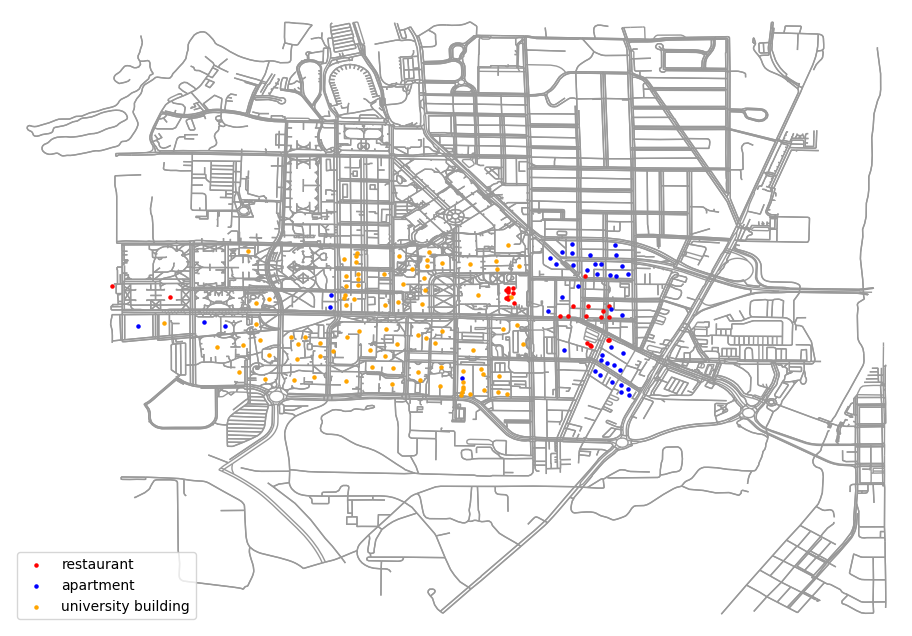

In [9]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pickle

# 设置地图中心点和距离
center_point = (40.4248, -86.9110)  # Purdue Memorial Union 的经纬度
distance = 1500  # 1.5 公里

# 定义西拉斐特区域边界（你提供的坐标范围）
boundary_coords = [
    (-86.930548, 40.427371),  # Northwest corner
    (-86.905710, 40.427371),  # Northeast corner
    (-86.905710, 40.420486),  # Southeast corner
    (-86.930548, 40.420486)   # Southwest corner
]
west_lafayette_boundary = Polygon(boundary_coords)

# 尝试加载保存的兴趣点数据和图表
try:
    with open('pois.pkl', 'rb') as f:
        result = pickle.load(f)
    with open('graph.pkl', 'rb') as f:
        G = pickle.load(f)
    print("Loaded saved data.")
except FileNotFoundError:
    # 获取兴趣点位置
    restaurants = ox.features_from_point(center_point, tags={'amenity': 'restaurant'}, dist=distance)
    apartments = ox.features_from_point(center_point, tags={'building': 'apartments'}, dist=distance)
    university_buildings = ox.features_from_point(center_point, tags={'building': 'university'}, dist=distance)

    # 创建一个新的 DataFrame 以存储结果
    def create_poi_dataframe(pois, poi_type):
        df = pd.DataFrame(columns=['name', 'longitude', 'latitude', 'index', 'type'])
        for idx, row in pois.iterrows():
            name = row['name'] if 'name' in row and pd.notna(row['name']) else 'Unnamed'
            # 处理几何数据，提取点或者多边形的中心点
            if row.geometry.geom_type == 'Point':
                lon, lat = row.geometry.x, row.geometry.y
            elif row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                lon, lat = row.geometry.centroid.x, row.geometry.centroid.y
            else:
                continue

            # 过滤只包含西拉斐特区域内的点
            if west_lafayette_boundary.contains(Point(lon, lat)):
                df = pd.concat([df, pd.DataFrame([{
                    'name': name,
                    'longitude': lon,
                    'latitude': lat,
                    'index': len(df),
                    'type': poi_type
                }])], ignore_index=True)
        return df

    # 分别创建三个兴趣点 DataFrame
    restaurants_df = create_poi_dataframe(restaurants, 'restaurant')
    apartments_df = create_poi_dataframe(apartments, 'apartment')
    university_buildings_df = create_poi_dataframe(university_buildings, 'university building')

    # 合并所有兴趣点
    result = pd.concat([restaurants_df, apartments_df, university_buildings_df], ignore_index=True)

    # 打印结果
    print(result)

    # 保存为 CSV 文件
    result.to_csv('purdue_pois.csv', index=False)

    # 创建图表
    G = ox.graph_from_point(center_point, dist=distance, network_type='all')

    # 保存兴趣点数据和图表
    with open('pois.pkl', 'wb') as f:
        pickle.dump(result, f)
    with open('graph.pkl', 'wb') as f:
        pickle.dump(G, f)
    print("Saved data.")

# 设置绘图参数
fig, ax = plt.subplots(figsize=(12, 8))
colors = {'restaurant': 'red', 'apartment': 'blue', 'university building': 'orange'}

# 绘制道路图
ox.plot_graph(G, ax=ax, show=False, close=False, bgcolor='black', node_color='none')

# 绘制兴趣点
for idx, row in result.iterrows():
    color = colors[row['type']]
    point = Point(row['longitude'], row['latitude'])
    gpd.GeoSeries([point]).plot(ax=ax, color=color, markersize=5, label=row['type'] if row['type'] not in ax.get_legend_handles_labels()[1] else "")

# 显示图例
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

# 保存图像
plt.savefig('purdue_map.png', dpi=300, bbox_inches='tight', pad_inches=0)

# 显示地图
plt.show()

# test5

Loaded saved data.


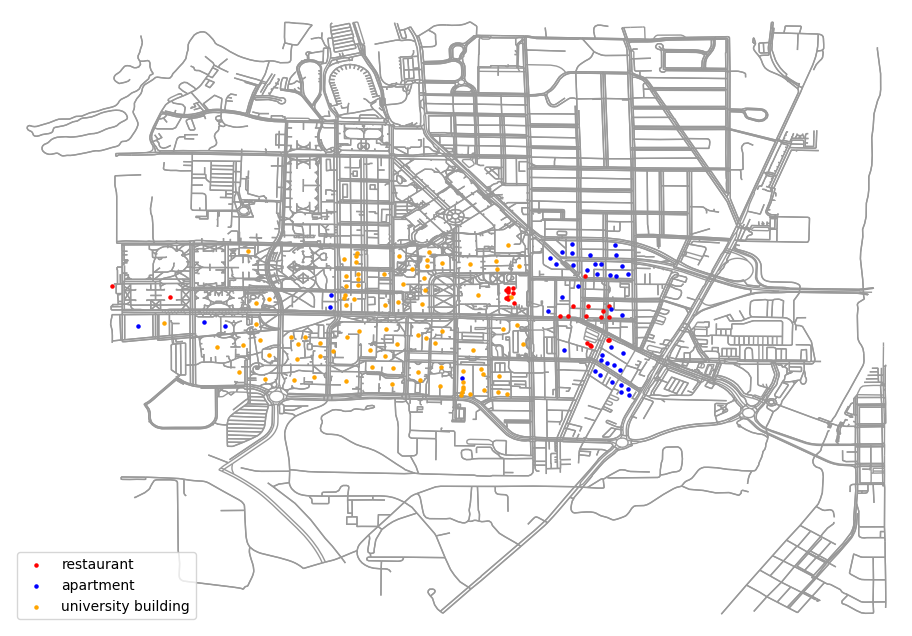

            6660401822   3053702018   8023064193   8023064193   9837779506   \
6660401822        0.000      110.727      338.233      338.233     1899.550   
3053702018      110.727        0.000      235.730      235.730     1791.549   
8023064193      338.233      235.730        0.000        0.000     2025.697   
8023064193      338.233      235.730        0.000        0.000     2025.697   
9837779506     1899.550     1791.549     2019.724     2019.724        0.000   

            11186807069  10012460408  8023920893   3200424858   10059976705  \
6660401822       65.499      217.632      189.007      151.907      304.268   
3053702018       45.228      208.959      262.924      225.824      196.267   
8023064193      272.734      215.512      280.577      261.121      430.415   
8023064193      272.734      215.512      280.577      261.121      430.415   
9837779506     1836.777     2000.508     2054.473     2017.373     1650.891   

            ...  6774510780   10050244668  8241748

C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_30012\3061634149.py:123: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shortest_paths_df = shortest_paths_df.fillna(float('inf'))


In [10]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pickle
import networkx as nx

# 设置地图中心点和距离
center_point = (40.4248, -86.9110)  # Purdue Memorial Union 的经纬度
distance = 1500  # 1.5 公里

# 定义西拉斐特区域边界（你提供的坐标范围）
boundary_coords = [
    (-86.930548, 40.427371),  # Northwest corner
    (-86.905710, 40.427371),  # Northeast corner
    (-86.905710, 40.420486),  # Southeast corner
    (-86.930548, 40.420486)   # Southwest corner
]
west_lafayette_boundary = Polygon(boundary_coords)

# 尝试加载保存的兴趣点数据和图表
try:
    with open('pois.pkl', 'rb') as f:
        result = pickle.load(f)
    with open('graph.pkl', 'rb') as f:
        G = pickle.load(f)
    print("Loaded saved data.")
except FileNotFoundError:
    # 获取兴趣点位置
    restaurants = ox.features_from_point(center_point, tags={'amenity': 'restaurant'}, dist=distance)
    apartments = ox.features_from_point(center_point, tags={'building': 'apartments'}, dist=distance)
    university_buildings = ox.features_from_point(center_point, tags={'building': 'university'}, dist=distance)

    # 创建一个新的 DataFrame 以存储结果
    def create_poi_dataframe(pois, poi_type):
        df = pd.DataFrame(columns=['name', 'longitude', 'latitude', 'index', 'type'])
        for idx, row in pois.iterrows():
            name = row['name'] if 'name' in row and pd.notna(row['name']) else 'Unnamed'
            # 处理几何数据，提取点或者多边形的中心点
            if row.geometry.geom_type == 'Point':
                lon, lat = row.geometry.x, row.geometry.y
            elif row.geometry.geom_type in ['Polygon', 'MultiPolygon']:
                lon, lat = row.geometry.centroid.x, row.geometry.centroid.y
            else:
                continue

            # 过滤只包含西拉斐特区域内的点
            if west_lafayette_boundary.contains(Point(lon, lat)):
                df = pd.concat([df, pd.DataFrame([{
                    'name': name,
                    'longitude': lon,
                    'latitude': lat,
                    'index': len(df),
                    'type': poi_type
                }])], ignore_index=True)
        return df

    # 分别创建三个兴趣点 DataFrame
    restaurants_df = create_poi_dataframe(restaurants, 'restaurant')
    apartments_df = create_poi_dataframe(apartments, 'apartment')
    university_buildings_df = create_poi_dataframe(university_buildings, 'university building')

    # 合并所有兴趣点
    result = pd.concat([restaurants_df, apartments_df, university_buildings_df], ignore_index=True)

    # 打印结果
    print(result)

    # 保存为 CSV 文件
    result.to_csv('purdue_pois.csv', index=False)

    # 创建图表
    G = ox.graph_from_point(center_point, dist=distance, network_type='all')

    # 保存兴趣点数据和图表
    with open('pois.pkl', 'wb') as f:
        pickle.dump(result, f)
    with open('graph.pkl', 'wb') as f:
        pickle.dump(G, f)
    print("Saved data.")

# 设置绘图参数
fig, ax = plt.subplots(figsize=(12, 8))
colors = {'restaurant': 'red', 'apartment': 'blue', 'university building': 'orange'}

# 绘制道路图
ox.plot_graph(G, ax=ax, show=False, close=False, bgcolor='black', node_color='none')

# 绘制兴趣点
for idx, row in result.iterrows():
    color = colors[row['type']]
    point = Point(row['longitude'], row['latitude'])
    gpd.GeoSeries([point]).plot(ax=ax, color=color, markersize=5, label=row['type'] if row['type'] not in ax.get_legend_handles_labels()[1] else "")

# 显示图例
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

# 保存图像
plt.savefig('purdue_map.png', dpi=300, bbox_inches='tight', pad_inches=0)

# 显示地图
plt.show()

# 计算所有节点之间的最短路径距离
lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='length'))

# 获取所有兴趣点的节点 ID
poi_node_ids = [ox.distance.nearest_nodes(G, row['longitude'], row['latitude']) for idx, row in result.iterrows()]

# 创建距离矩阵 DataFrame
shortest_paths_df = pd.DataFrame(index=poi_node_ids, columns=poi_node_ids)

for origin, path_lengths in lengths.items():
    if origin in poi_node_ids:
        for destination, distance in path_lengths.items():
            if destination in poi_node_ids:
                shortest_paths_df.at[origin, destination] = distance

# 填充 NaN 值为无穷大（如果存在）
shortest_paths_df = shortest_paths_df.fillna(float('inf'))

# 保存最短路径距离矩阵表
shortest_paths_df.to_csv('purdue_shortest_paths_matrix.csv', index_label='node_id')

# 打印部分结果
print(shortest_paths_df.head())

In [11]:
shortest_paths_df.head()

,6660401822,3053702018,8023064193,8023064193,9837779506,11186807069,10012460408,8023920893,3200424858,10059976705,...,6774510780,10050244668,8241748550,8023689371,6660558184,8723491343,11065939879,10012458713,3061363945,8723491261
6660401822,0.000,110.727,338.233,338.233,1899.550,65.499,217.632,189.007,151.907,304.268,...,1186.330,1580.547,1735.790,532.772,1279.739,1127.931,937.236,461.463,670.942,936.086
3053702018,110.727,0.000,235.730,235.730,1791.549,45.228,208.959,262.924,225.824,196.267,...,1078.329,1472.546,1627.789,540.537,1171.738,1019.930,829.235,352.701,631.938,828.085
8023064193,338.233,235.730,0.000,0.000,2025.697,272.734,215.512,280.577,261.121,430.415,...,1200.588,1618.085,1831.441,775.157,1246.337,1034.994,850.666,556.219,866.086,924.668
8023064193,338.233,235.730,0.000,0.000,2025.697,272.734,215.512,280.577,261.121,430.415,...,1200.588,1618.085,1831.441,775.157,1246.337,1034.994,850.666,556.219,866.086,924.668
9837779506,1899.550,1791.549,2019.724,2019.724,0.000,1836.777,2000.508,2054.473,2017.373,1650.891,...,1148.678,835.485,548.514,1840.678,1293.091,1566.983,1548.622,1633.808,1368.558,1280.123


158

In [15]:
# 获取所有兴趣点的节点 ID
poi_node_ids = [ox.distance.nearest_nodes(G, row['longitude'], row['latitude']) for idx, row in result.iterrows()]

# 创建包含兴趣点详细信息和对应节点 ID 的数据结构
node_info = result.copy()
node_info['node_id'] = poi_node_ids

# 保存节点信息
node_info.to_csv('purdue_node_info.csv', index=False)

# 创建距离矩阵 DataFrame
shortest_paths_df = pd.DataFrame(index=poi_node_ids, columns=poi_node_ids)

for origin, path_lengths in lengths.items():
    if origin in poi_node_ids:
        for destination, distance in path_lengths.items():
            if destination in poi_node_ids:
                shortest_paths_df.at[origin, destination] = distance

# 填充 NaN 值为无穷大（如果存在）
shortest_paths_df = shortest_paths_df.fillna(float('inf'))

# 保存最短路径距离矩阵表
shortest_paths_df.to_csv('purdue_shortest_paths_matrix.csv', index_label='node_id')

# 打印部分结果
print(shortest_paths_df.head())
print(node_info.head())

            6660401822   3053702018   8023064193   8023064193   9837779506   \
6660401822        0.000      110.727      338.233      338.233     1899.550   
3053702018      110.727        0.000      235.730      235.730     1791.549   
8023064193      338.233      235.730        0.000        0.000     2025.697   
8023064193      338.233      235.730        0.000        0.000     2025.697   
9837779506     1899.550     1791.549     2019.724     2019.724        0.000   

            11186807069  10012460408  8023920893   3200424858   10059976705  \
6660401822       65.499      217.632      189.007      151.907      304.268   
3053702018       45.228      208.959      262.924      225.824      196.267   
8023064193      272.734      215.512      280.577      261.121      430.415   
8023064193      272.734      215.512      280.577      261.121      430.415   
9837779506     1836.777     2000.508     2054.473     2017.373     1650.891   

            ...  6774510780   10050244668  8241748

C:\Users\Yuchen Du\AppData\Local\Temp\ipykernel_30012\2980878891.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shortest_paths_df = shortest_paths_df.fillna(float('inf'))
